## Seismic Data in the World

#### Task: 

Find an earthquake that happened in the last hour somewhere on this planet. Find a seismic station close enough, download the data and display them. Characterize the data. Find the onset time of the P wave. 


A: The Rhaspberry Shake Network https://raspberryshake.net/

 <p style="width:40%;float:center;padding-left:50px">
<img src=https://www.earthmagazine.org/sites/earthmagazine.org/files/2017-11/raspberryshake-who-is-it-for.png>
<span style="font-size:smaller">
</span>
</p>

Inventory created at 2019-10-17T11:42:01.361400Z
	Sending institution: SeisComP3 (gempa testbed)
	Contains:
		Networks (1):
			AM
		Stations (4):
			AM.R3D3B (Raspberry Shake Citizen Science Station) (4x)
		Channels (4):
			AM.R3D3B.00.SHZ (4x)


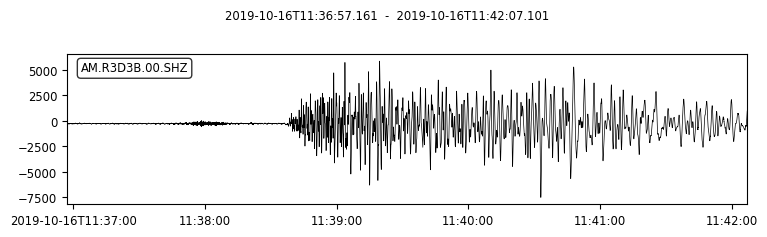

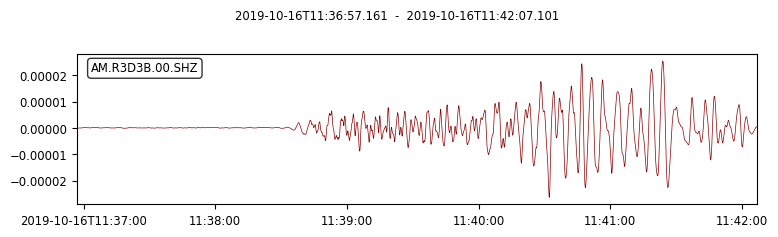

In [16]:
# get data and remove instrument response

# Load stuff
from obspy import read_inventory, read
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime, Stream

# set the station name and download the response information
#stn = 'R6673'
#stn = 'RB822'
#stn = 'RA007'
stn = 'R3D3B'
inv = read_inventory('https://fdsnws.raspberryshakedata.com/fdsnws/station/1/query?network=AM&station=%s&level=resp&format=xml' % (stn))
print (inv)

# set data start/end times
start = UTCDateTime(2019, 10, 16, 11, 37, 0) # (YYYY, m, d, H, M, S)
end = UTCDateTime(2019, 10, 16, 11,42,0) # (YYYY, m, d, H, M, S)

# set the FDSN server location and channel names
rs = Client(base_url='https://fdsnws.raspberryshakedata.com/')
channels = ['SHZ,EHZ'] # ENx = accelerometer channels; EHx or SHZ = geophone channels

# get waveforms, put them all into one Stream, and attach the response
stream = Stream()
for ch in channels:
    trace = rs.get_waveforms('AM', stn, '00',ch, start, end)
    stream += trace
stream.plot(color='black', linewidth='0.5',handle='true')

rawdata = stream.copy()
rawdata.detrend()

# attach the response info
stream.attach_response(inv)

#####
# Choose only one of the following
#####
# remove the response and plot ACC
#resp_removed_ACC = stream.remove_response(output='ACC') # convert to acceleration in M/S
#resp_removed_ACC.plot(color='darkgreen', linewidth='0.5', handle='true')

# remove the response and plot VEL
# resp_removed_VEL = stream.remove_response(output='VEL') # convert to acceleration in M/S
# resp_removed_VEL.plot(color='darkblue', linewidth='0.5', handle='true')

# remove the response and plot DISP
resp_removed_DISP = stream.remove_response(output='DISP') # convert to acceleration in M/S
resp_removed_DISP.plot(color='darkred', linewidth='0.5')

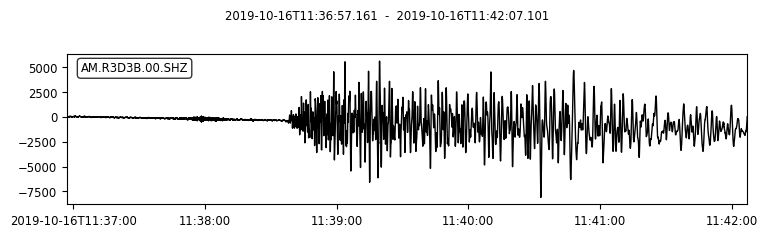

In [17]:
rawdata.plot()

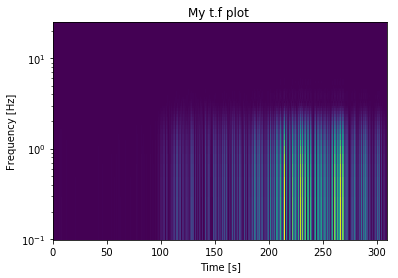

[None]

In [18]:
stream.spectrogram(log=True, title='My t.f plot ')